<a href="https://colab.research.google.com/github/FutureOfTed/AI-class/blob/main/Week9/LSTM_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/data/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [5]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [6]:
# 3. 데이터셋 생성 함수 정의
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

In [9]:
# 3-1. 시퀀스 생성 (window_6)
window_6 = 6
X_6, y_6 = create_sequences(data, window_6)

# 3-2. 시퀀스 생성 (window_12)
window_12 = 12
X_12, y_12 = create_sequences(data, window_12)

In [10]:
# 4. train/test 데이터 분리
# 전체 데이터의 80%를 훈련 데이터로 사용
train_size_6 = int(len(X_6) * 0.8)
X_train_6, X_test_6 = X_6[:train_size_6], X_6[train_size_6:]
y_train_6, y_test_6 = y_6[:train_size_6], y_6[train_size_6:]

train_size_12 = int(len(X_12) * 0.8)
X_train_12, X_test_12 = X_12[:train_size_12], X_12[train_size_12:]
y_train_12, y_test_12 = y_12[:train_size_12], y_12[train_size_12:]

In [11]:
# 5. LSTM 모델 정의
# 5-1. LSTM 모델 (윈도우 사이즈 6)
tf.keras.backend.clear_session()
model_6 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window_6, 1)),
    tf.keras.layers.Dense(1)
])
model_6.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# 5-2. LSTM 모델 (윈도우 사이즈 12)
tf.keras.backend.clear_session()
model_12 = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window_12, 1)),
    tf.keras.layers.Dense(1)
])
model_12.compile(optimizer='adam', loss='mse')

In [14]:
# 6-1. 모델(윈도우 사이즈 6) 훈련 및 History 저장
EPOCHS = 50
BATCH_SIZE = 8

print("--- model_6 훈련 시작 ---")
history_6 = model_6.fit(
    X_train_6, y_train_6,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=(X_test_6, y_test_6) # 테스트 데이터로 검증
)
print("--- model_6 훈련 완료 ---")

--- model_6 훈련 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0160
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - val_loss: 0.0176
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055 - val_loss: 0.0149
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0049 - val_loss: 0.0153
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0149
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0148
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - val_loss: 0.0185
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - val_loss: 0.0166
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0159
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0053 - val_loss: 0.0151
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0056 - val_loss: 0.0150
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [15]:
# 6-2. 모델(윈도우 사이즈 12) 훈련 및 History 저장
print("--- model_12 훈련 시작 ---")
history_12 = model_12.fit(
    X_train_12, y_train_12,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=(X_test_12, y_test_12) # 테스트 데이터로 검증
)
print("--- model_12 훈련 완료 ---")

--- model_12 훈련 시작 ---
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0026 - val_loss: 0.0094
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - val_loss: 0.0090
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0089
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0140
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - val_loss: 0.0108
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - val_loss: 0.0180
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - val_loss: 0.0106
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0131
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_loss: 0.0101
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - val_loss: 0.0139
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - val_loss: 0.0077
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


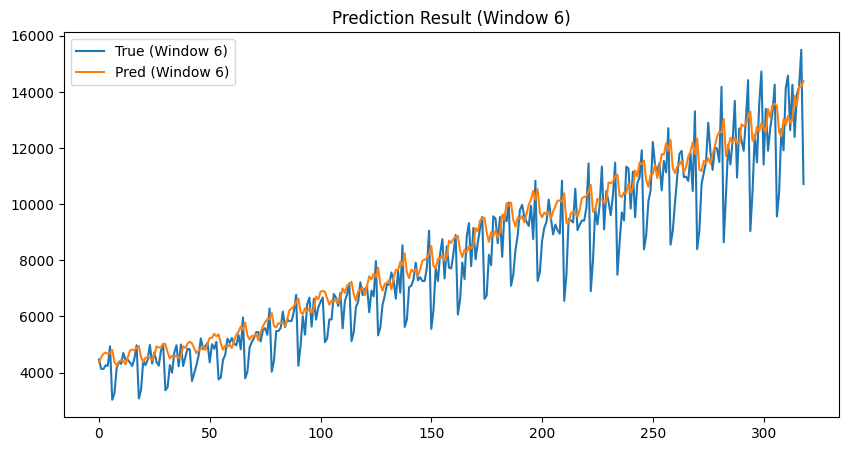

In [16]:
# 7. 예측 시각화 (선택 사항: 모델 성능 확인)
# 7-1. 예측 (윈도우 사이즈 6) - 전체 데이터셋을 사용
pred_6 = model_6.predict(X_6)
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(y_6), label='True (Window 6)')
plt.plot(scaler.inverse_transform(pred_6), label='Pred (Window 6)')
plt.title('Prediction Result (Window 6)')
plt.legend()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


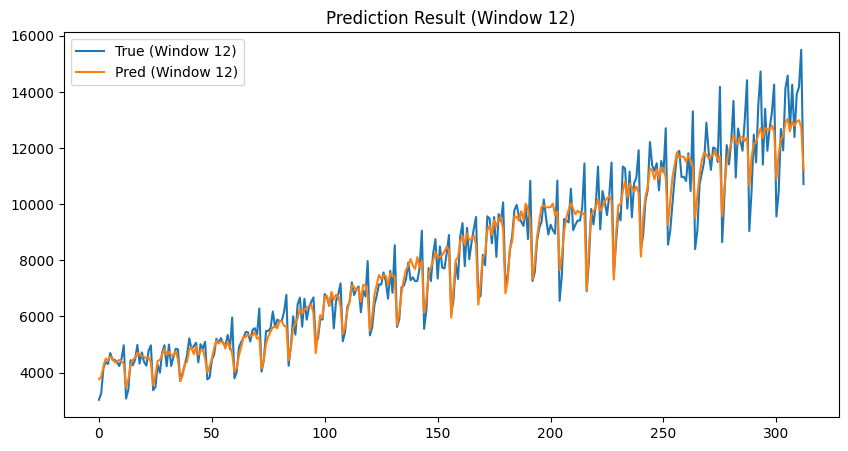

In [17]:
# 7-2. 예측 (윈도우 사이즈 12) - 전체 데이터셋을 사용
pred_12 = model_12.predict(X_12)
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(y_12), label='True (Window 12)')
plt.plot(scaler.inverse_transform(pred_12), label='Pred (Window 12)')
plt.title('Prediction Result (Window 12)')
plt.legend()
plt.show()

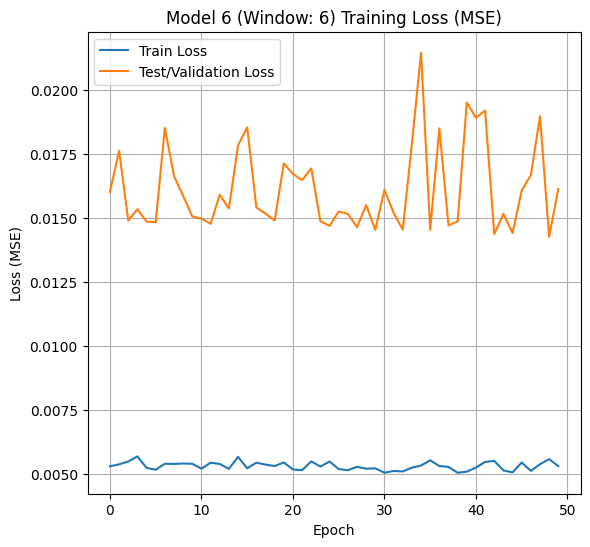

In [18]:
# 8. MSE 그래프 시각화 (Loss Curve)

plt.figure(figsize=(14, 6))

# 8-1. model_6 MSE 그래프
plt.subplot(1, 2, 1)
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test/Validation Loss')
plt.title(f'Model 6 (Window: {window_6}) Training Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

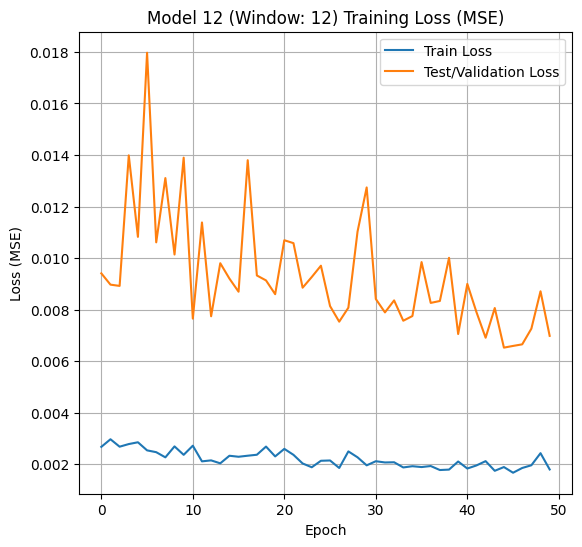

In [21]:
# 7-2. model_12 MSE 그래프
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(history_12.history['loss'], label='Train Loss')
plt.plot(history_12.history['val_loss'], label='Test/Validation Loss')
plt.title(f'Model 12 (Window: {window_12}) Training Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)